In [1]:
import os
import sys
import glob
import shutil
import argparse

import numpy as np

from sklearn.model_selection import train_test_split

import cv2
import torch
from torch import nn, optim
from torchvision import datasets, transforms

from tqdm import tqdm

In [26]:
# load and organize the file structure
def loadData():

    directory = os.listdir()

    if 'dataset' in directory:
        print('already loaded data..')
        return
    
    # 모든 파일 로드
    dataset = []
    folders = os.listdir('./thumbnails')
    for label, folder in enumerate(folders):
        files = glob.glob(os.path.join('thumbnails', folder, '*.jpg'))
        dataset.extend(list(zip(files, [folder] * len(files))))
    dataset = np.array(dataset)
    
    # 데이터셋 별, 클래스 별 폴더 정리
    train, test = train_test_split(dataset, test_size = 0.2, stratify = dataset[:, -1])
    
    DATA_PATH = 'dataset'
    if not os.path.exists(DATA_PATH):
        os.mkdir(DATA_PATH)
        os.makedirs(os.path.join(DATA_PATH, 'train'))
        os.makedirs(os.path.join(DATA_PATH, 'test'))
        
    for folder in set(dataset[:, -1]):
        os.makedirs(os.path.join(DATA_PATH, "train", folder))
        os.makedirs(os.path.join(DATA_PATH, "test", folder))
    
    # 파일 이동
    for folder, data in [('train', train), ('test', test)]:
        for file in data:
            label = file[-1]
            file_name = label + '_' + file[0].split('/')[-1]
            from_path = file[0]
            to_path = os.path.join('dataset', folder, label, file_name)
            shutil.move(from_path, to_path)
            
    print(f'total files: {len(dataset)}')
    print(f'total labels: {len(set(dataset[:, -1]))}')

In [27]:
loadData()

total files: 23296
total labels: 10


In [51]:
x0 = np.array([0.5, 0.4, 0.2]).reshape(-1, 1)

w = np.random.randn(3,3)
b = np.random.randn(3,1)

In [52]:
np.multiply(x0,
           np.dot(w, x0) + b
           ) + x0

array([[-0.60881099],
       [ 0.11129566],
       [ 0.03190344]])

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

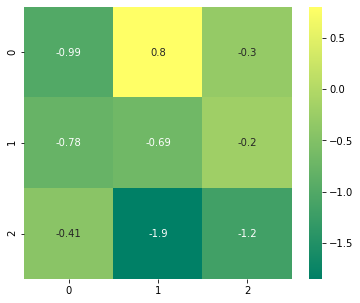

In [65]:
plt.figure(figsize = (6,5))
sns.heatmap(w, cmap = 'summer', annot = True)

In [70]:
1/14 * 1/14 * 1/14 * 1/14 * 1/2

1.3015410245730946e-05

In [69]:
1/10*1/10*2/10*1/10*1/2

0.0001